In [1]:
# Step 0 installs
%pip install transformers torch pandas numpy matplotlib networkx seaborn scikit-learn umap-learn ipywidgets

# Step 0: Imports
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.cluster import DBSCAN
import seaborn as sns
import networkx as nx
import os

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 1: FASTA file paths (ensure commas between entries)
embedding_files = [
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wA2_CPE0002577_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wA3_CPE0002585_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wB9_CPE0002641_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wD9_CPE0002643_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wF2_CPE0002582_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wF4_CPE0002598_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wF8_CPE0002636_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wF9_CPE0002645_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wF11_CPE0002661_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wG6_CPE0002621_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234098wH2_CPE0002584_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wA1_CPE0002669_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wA3_CPE0002687_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wA5_CPE0002707_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wB2_CPE0002678_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wC3_CPE0002690_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wG1_CPE0002675_assembly_filtered.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wG3_CPE0002696_assembly_filtered copy.pt",
r"C:\Users\yalin\OneDrive\Desktop\MRes\A Nosocomial Project\CPE Embedding Nucleotide Test\E_hormaechei\234099wG3_CPE0002696_assembly_filtered.pt",
]

In [3]:
# Step 2: Load embeddings
headers = []
embeddings = []

for file_path in embedding_files:
    try:
        emb = torch.load(file_path)
        if torch.is_tensor(emb):
            emb = emb.numpy()
        headers.append(os.path.basename(file_path))
        embeddings.append(emb)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Step 3: Create dataframe
df_all = pd.DataFrame({
    'Header': headers,
    'embedding': embeddings
})

# Step 4: Extract headers and embeddings
headers = []
embeddings = []

for file_path in embedding_files:
    try:
        emb = torch.load(file_path, weights_only=True)
        if torch.is_tensor(emb) and emb.ndim == 1:
            headers.append(os.path.basename(file_path))
            embeddings.append(emb.numpy())
        else:
            print(f"Skipped {file_path}: not a 1D tensor")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


# Step 5: Create dataframe
df_all = pd.DataFrame({
    'Header': headers,
    'embedding': embeddings
})

X = np.stack(df_all['embedding'].values)



C:\Users\yalin\AppData\Local\Temp\ipykernel_3156\322149917.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb = torch.load(file_path)


In [6]:
# Step 6: Print cosine similarity values
print("Cosine Similarity Matrix:\n")
for i in range(len(df_all)):
    for j in range(len(df_all)):
        label_i = df_all['Header'][i]
        label_j = df_all['Header'][j]
        sim = similarity_matrix[i][j]
        print(f"{label_i} vs {label_j}: {sim:.4f}")


Cosine Similarity Matrix:

234098wA2_CPE0002577_assembly_filtered.pt vs 234098wA2_CPE0002577_assembly_filtered.pt: 1.0000
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wA3_CPE0002585_assembly_filtered.pt: 0.9996
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wB9_CPE0002641_assembly_filtered.pt: 0.9999
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wD9_CPE0002643_assembly_filtered.pt: 0.9999
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wF2_CPE0002582_assembly_filtered.pt: 0.9997
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wF4_CPE0002598_assembly_filtered.pt: 0.9998
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wF8_CPE0002636_assembly_filtered.pt: 0.9996
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wF9_CPE0002645_assembly_filtered.pt: 0.9998
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wF11_CPE0002661_assembly_filtered.pt: 0.9998
234098wA2_CPE0002577_assembly_filtered.pt vs 234098wG6_CPE0002621_assembly_filtered.pt: 0.9999
234098wA2_CPE0002577_a

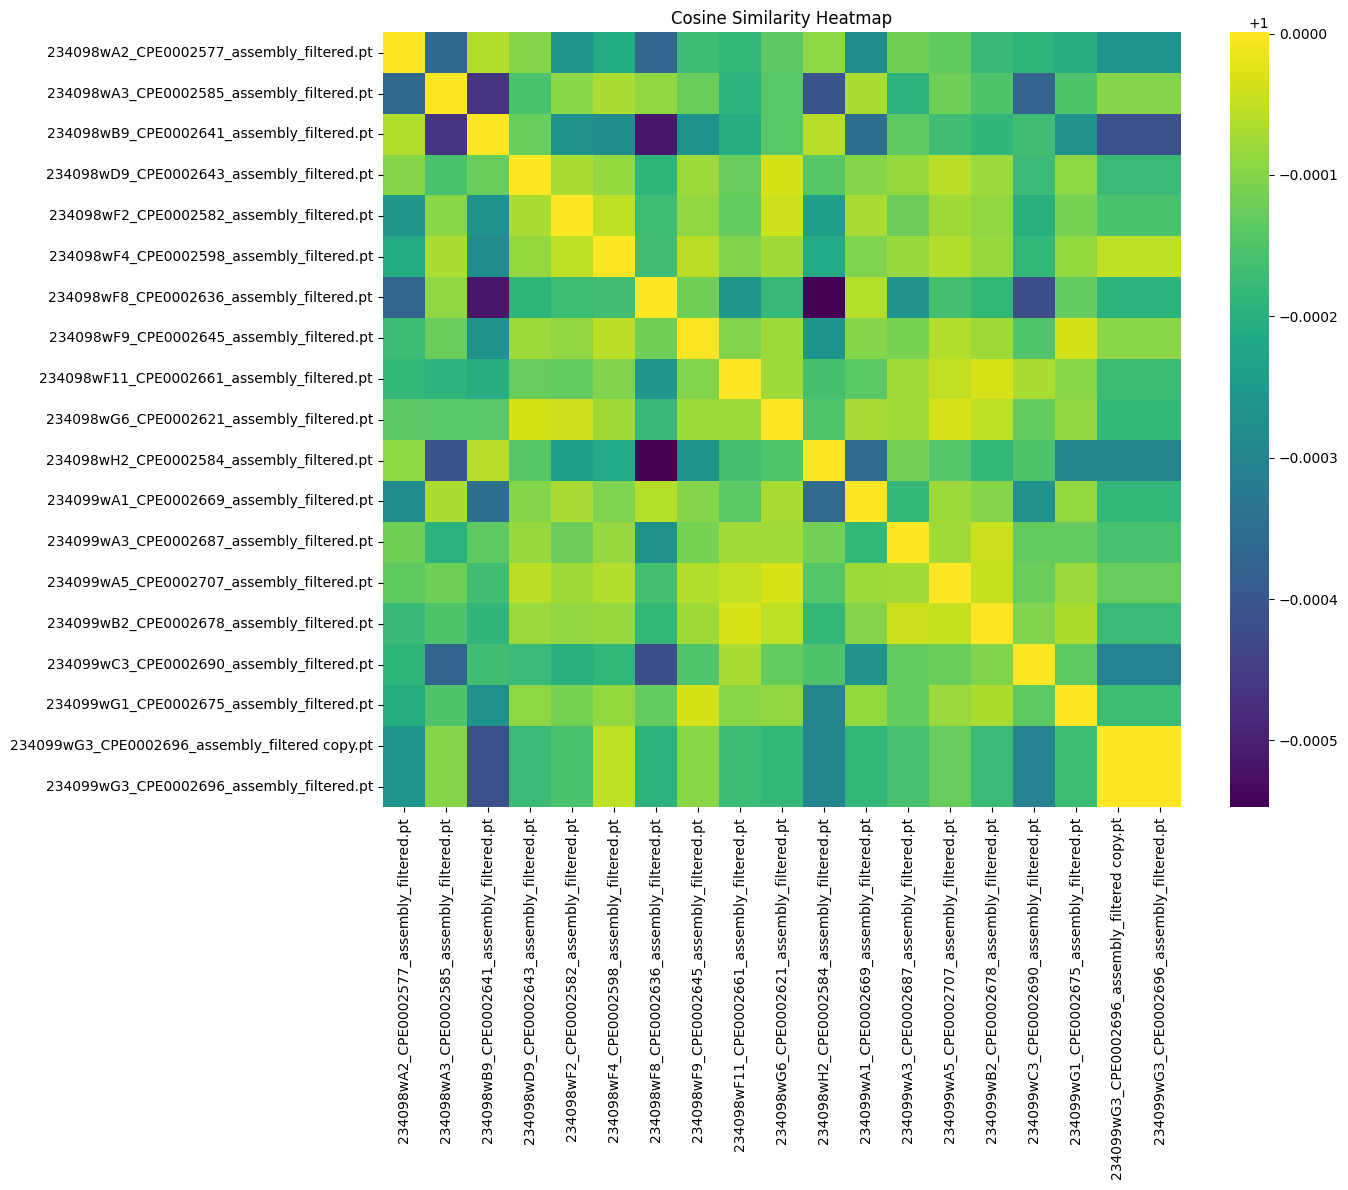

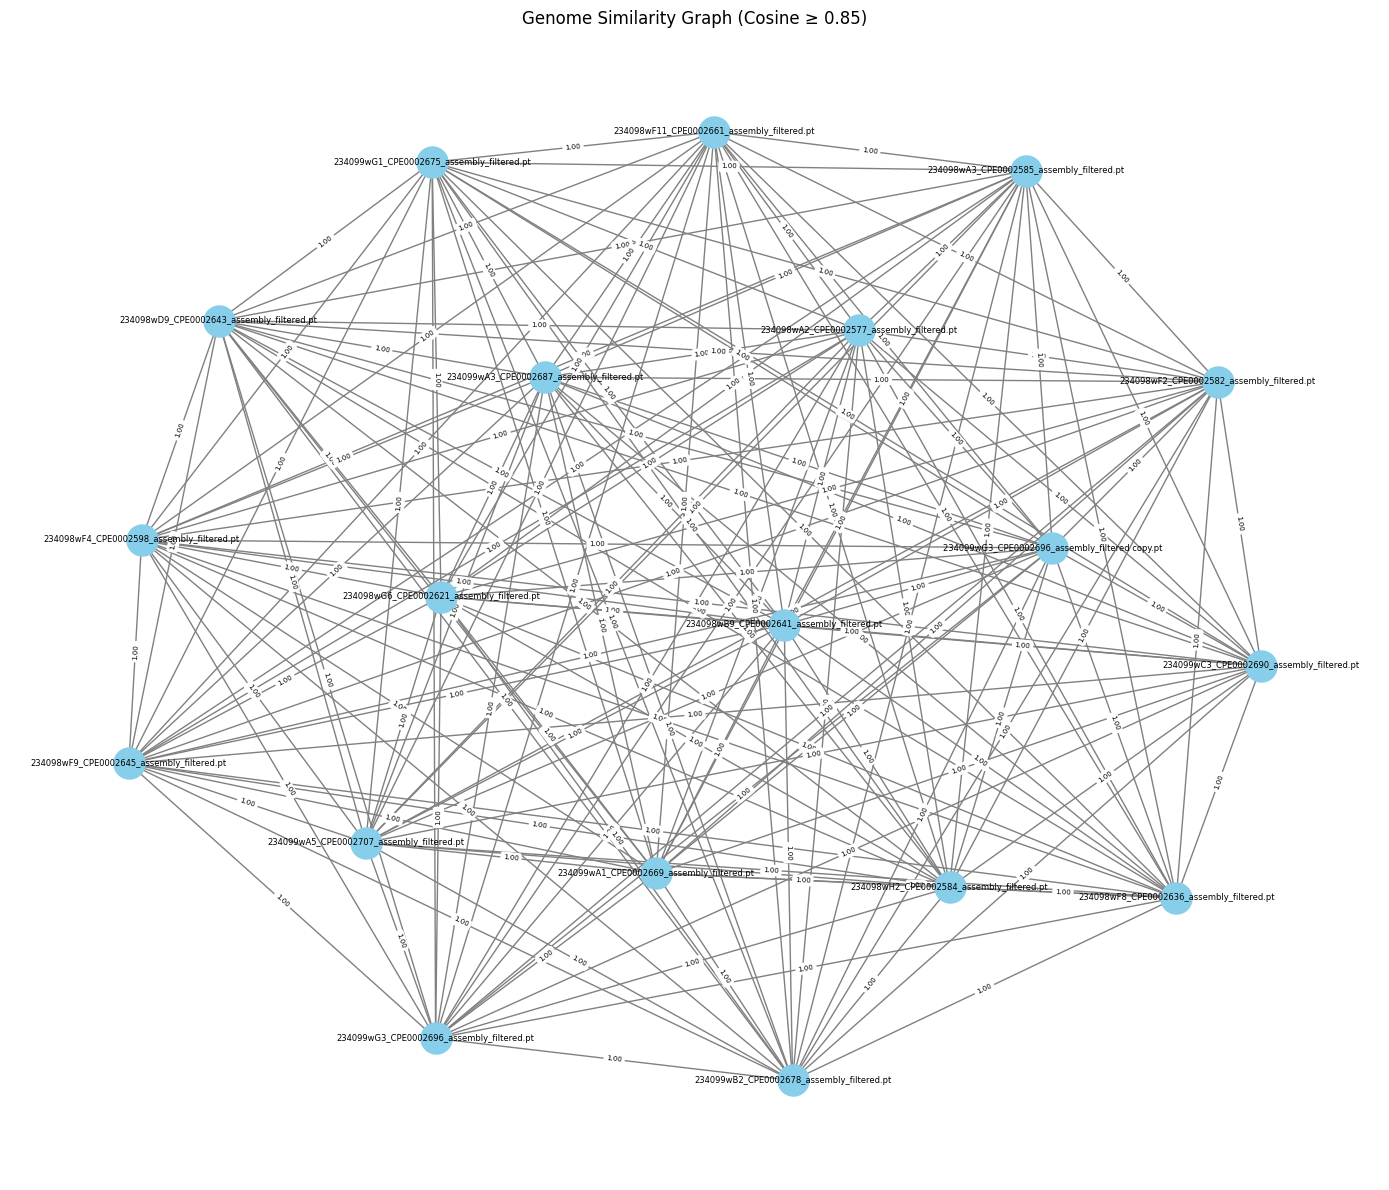

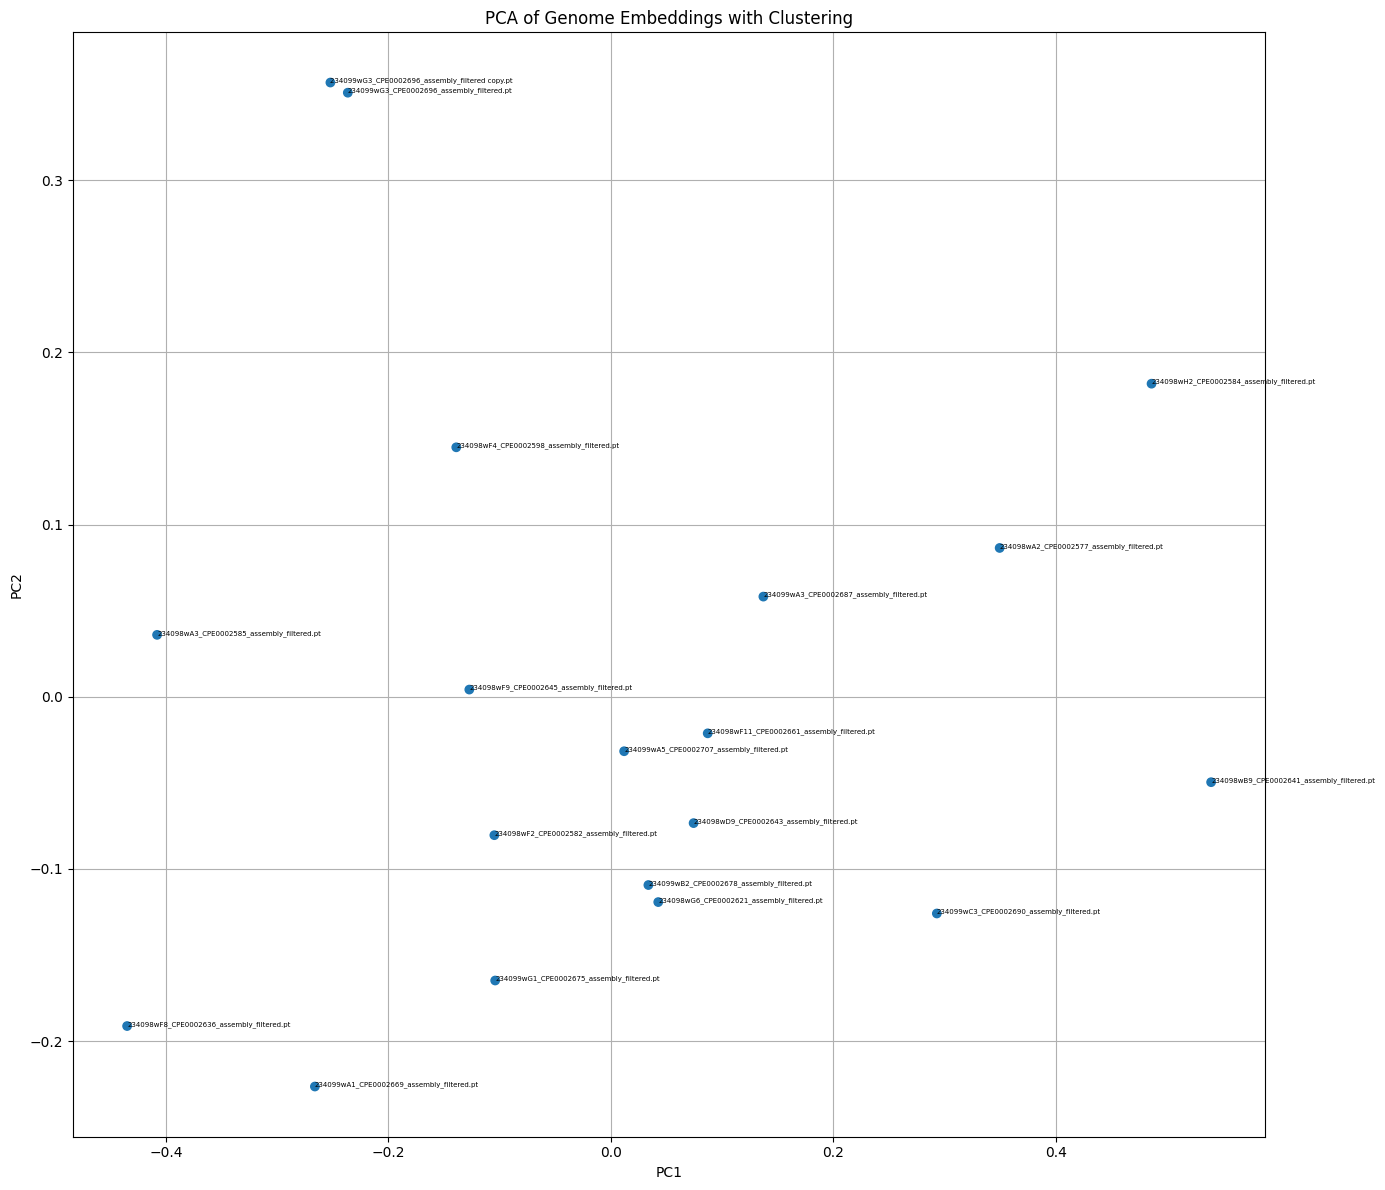

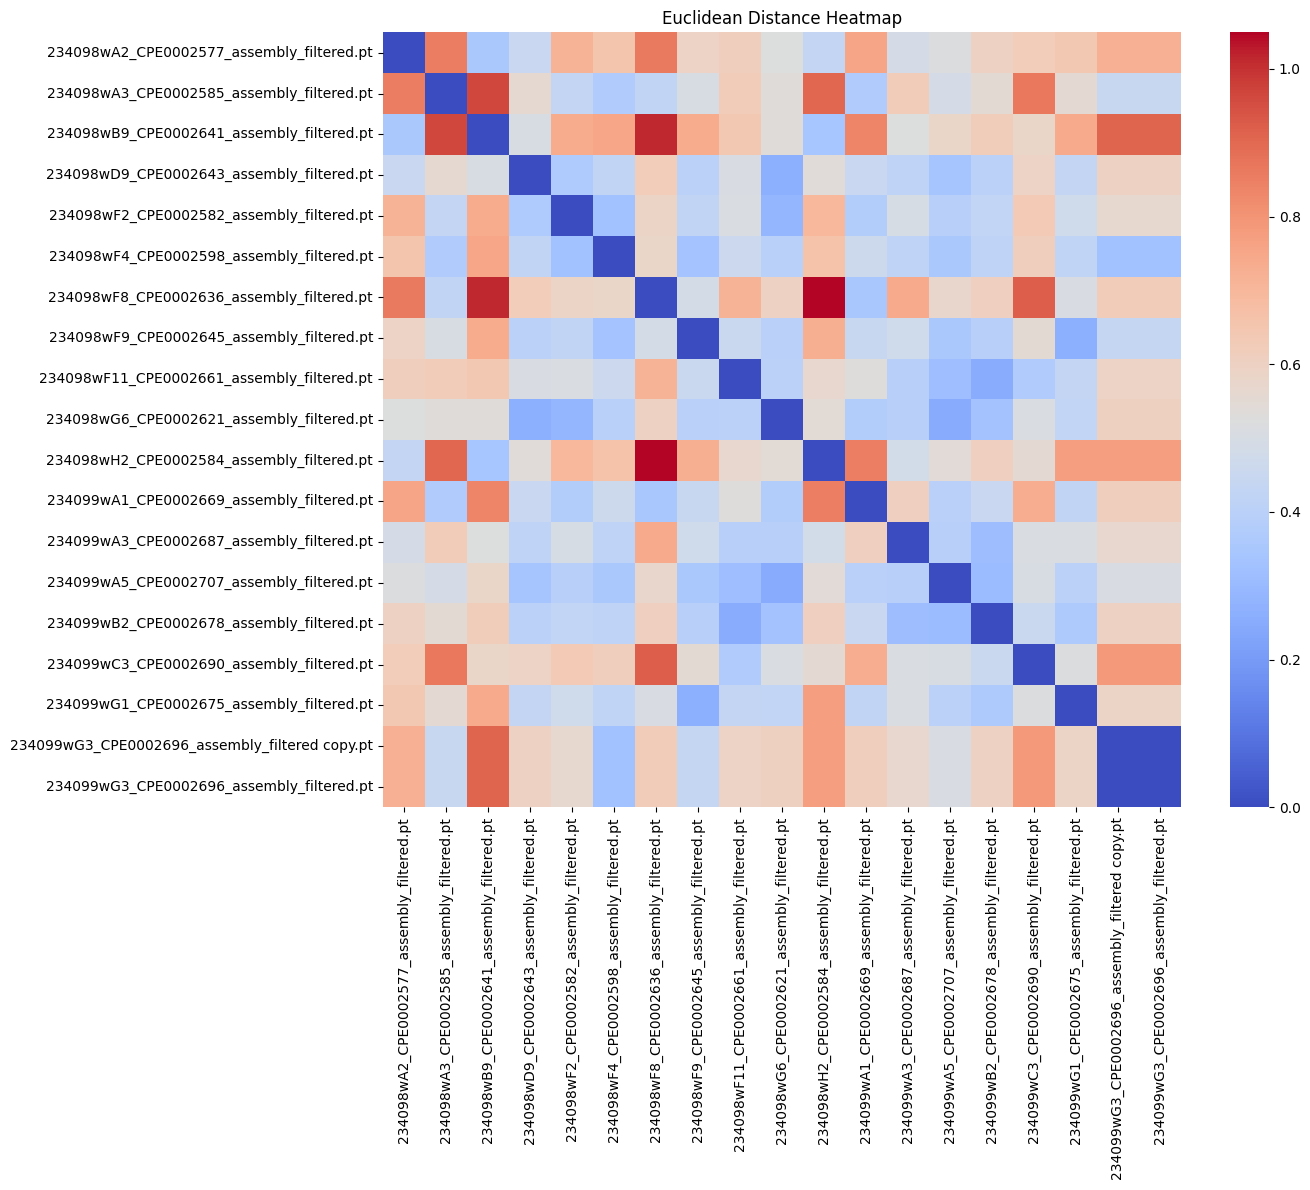

In [5]:
# Step 7: Cosine similarity matrix
X = np.stack(df_all['embedding'].values)
similarity_matrix = cosine_similarity(X)

# Step 8: Cosine heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(similarity_matrix, xticklabels=df_all['Header'], yticklabels=df_all['Header'], cmap='viridis')
plt.title("Cosine Similarity Heatmap")
plt.tight_layout()
plt.show()

# Step 9: DBSCAN clustering
clustering = DBSCAN(eps=0.1, min_samples=2, metric='cosine').fit(X)
df_all['Cluster'] = clustering.labels_

# Step 10: Similarity graph
threshold = 0.85
G = nx.Graph()
for i, label_i in enumerate(df_all['Header']):
    G.add_node(label_i)
    for j in range(i+1, len(df_all)):
        if similarity_matrix[i][j] >= threshold:
            G.add_edge(label_i, df_all['Header'][j], weight=similarity_matrix[i][j])

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=6)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)
plt.title("Genome Similarity Graph (Cosine ≥ 0.85)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Step 11: PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
jitter = np.random.normal(0, 0.01, X_pca.shape)
X_pca_jittered = X_pca + jitter
unique_clusters = sorted(df_all['Cluster'].unique())
color_map = {cluster: plt.cm.tab10(i % 10) for i, cluster in enumerate(unique_clusters)}
colors = [color_map[c] for c in df_all['Cluster']]

plt.figure(figsize=(14, 12))
plt.scatter(X_pca_jittered[:,0], X_pca_jittered[:,1], c=colors)
for i, label in enumerate(df_all['Header']):
    plt.text(X_pca_jittered[i,0], X_pca_jittered[i,1], label, fontsize=5)
plt.title("PCA of Genome Embeddings with Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Euclidean distance heatmap
distance_matrix = pairwise_distances(X, metric='euclidean')
plt.figure(figsize=(14, 12))
sns.heatmap(distance_matrix, xticklabels=df_all['Header'], yticklabels=df_all['Header'], cmap='coolwarm')
plt.title("Euclidean Distance Heatmap")
plt.tight_layout()
plt.show()
